In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df= pd.read_csv('medical_examination.csv')
mheight= df['height']/100
sqrheight= mheight**2
df['overweight']= df['weight']/(sqrheight)
df['overweight']= df['overweight']>25
df['overweight']= df['overweight'].replace({True: 1, False: 0})
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [5]:

df["cholesterol"]=(df["cholesterol"]>1).astype(int)
df["gluc"]=(df["gluc"]>1).astype(int)


df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


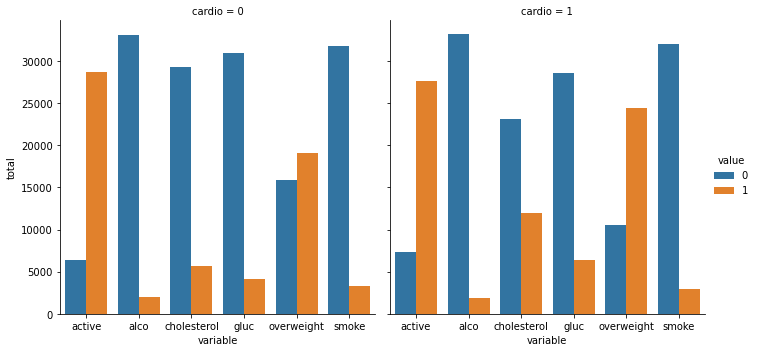

In [6]:
df_cat= pd.melt(df, id_vars= 'cardio', value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], var_name= 'variable' )

df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars= 'cardio')

fig= sns.catplot(data= df_cat, kind= 'count', x= 'variable', hue= 'value', col= 'cardio').set_axis_labels('variable', 'total')

fig= fig.fig

In [7]:
#Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
              (df['height'] >= df['height'].quantile(0.025)) &
              (df['height']<=df['height'].quantile(.975))&
              (df['weight'] >= df['weight'].quantile(0.025))&
              (df['weight'] <= df['weight'].quantile(0.975))]

<AxesSubplot:>

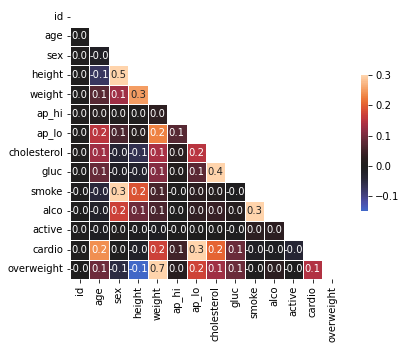

In [8]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
   
mask = np.triu(corr)

#Label the axis

fig, ax = plt.subplots(figsize=(7, 5))
    
# Draw the heatmap with 'sns.heatmap()'

sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
  

In [ ]:
#This data is taken from freecodecamp and the programming is based off of their youtube courses 